In [1]:
using PyPlot
using MAT
# include("acoustic_solver.jl")
include("barycenter.jl")

barycenter_unbalanced_1d_signal (generic function with 1 method)

## Interpolation with Wasserstein barycenter

Given two signals $g(x)$ and $h(x)$, the 2-Wasserstein barycenter $f$ can be defined as:
$$f(x) = \text{argmin}_{f} \ \lambda W_2^2(f,g) + (1-\lambda) W_2^2(f,h)$$

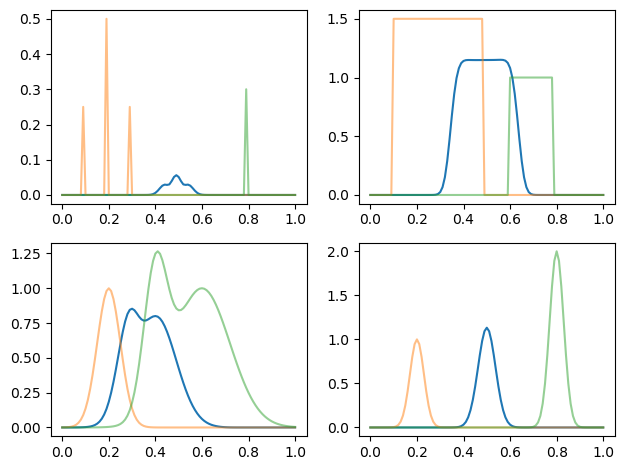

In [2]:
N = 101
x = range(0,step=0.01,length=N)
M = cost_matrix_1d(x, x; p=2)
reg = 1e-3
reg_m = 1e2

f = zeros(N); g = zeros(N)
f[10] = 0.25; f[20] = 0.5; f[30] = 0.25
g[80] = 0.3
P = zeros(N, 2)
P[:,1] = f; P[:,2] = g;
pp = barycenter_unbalanced_1d(P, M, reg, reg_m; lambda=[1,1], iterMax=100, verbose=true)
subplot(221)
plot(x,pp); plot(x, P[:,1], x, P[:,2], alpha=0.5)

f = zeros(N); g = zeros(N)
f[11:49] .= 1.5
g[61:79] .= 1
P = zeros(N, 2)
P[:,1] = f; P[:,2] = g;
pp = barycenter_unbalanced_1d(P, M, reg, reg_m; lambda=[1,1], iterMax=100, verbose=true)
subplot(222)
plot(x,pp); plot(x, P[:,1], x, P[:,2], alpha=0.5)

f = gauss_func(x, 0.2, 0.05)
g = gauss_func(x, 0.6, 0.12) + gauss_func(x, 0.4, 0.05)
P = zeros(N, 2)
P[:,1] = f; P[:,2] = g;
M = cost_matrix_1d(x, x; p=2)
pp = barycenter_unbalanced_1d(P, M, reg, reg_m; lambda=[1,1], iterMax=100, verbose=true)
subplot(223)
plot(x,pp); plot(x, P[:,1], x, P[:,2], alpha=0.5)

f = gauss_func(x, 0.2, 0.03)
g = 2*gauss_func(x, 0.8, 0.03)
P = zeros(N, 2)
P[:,1] = f; P[:,2] = g;
M = cost_matrix_1d(x, x; p=2)
pp = barycenter_unbalanced_1d(P, M, reg, reg_m; lambda=[1,1], iterMax=100, verbose=true)
subplot(224)
plot(x,pp); plot(x, P[:,1], x, P[:,2], alpha=0.5)
tight_layout()

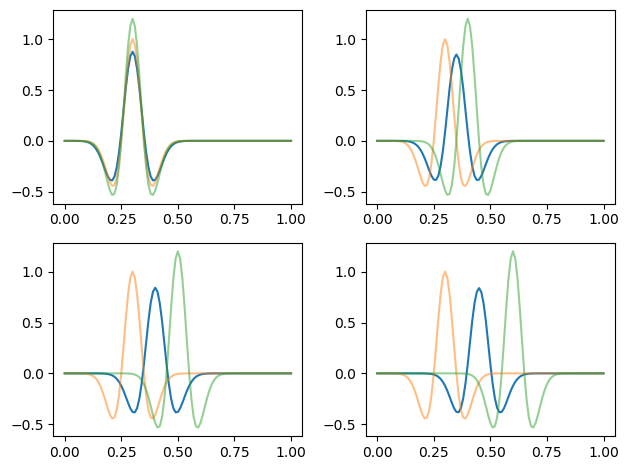

In [3]:
reg = 8e-4
reg_m = 1e2

f = ricker_func(x, 0.3, 0.05)
g = 1.2*ricker_func(x, 0.3, 0.05)
P = zeros(N,2); P[:,1] = f; P[:,2] = g
p = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=0, iterMax=100, verbose=true)
subplot(221)
plot(x,p); plot(x,f,x,g,alpha=0.5)

g = 1.2*ricker_func(x, 0.4, 0.05)
P = zeros(N,2); P[:,1] = f; P[:,2] = g
p = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=0, iterMax=100, verbose=true)
subplot(222)
plot(x,p); plot(x,f,x,g,alpha=0.5)

g = 1.2*ricker_func(x, 0.5, 0.05)
P = zeros(N,2); P[:,1] = f; P[:,2] = g
p = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=0, iterMax=100, verbose=true)
subplot(223)
plot(x,p); plot(x,f,x,g,alpha=0.5)

g = 1.2*ricker_func(x, 0.6, 0.05)
P = zeros(N,2); P[:,1] = f; P[:,2] = g
p = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=0, iterMax=100, verbose=true)
subplot(224)
plot(x,p); plot(x,f,x,g,alpha=0.5)

tight_layout()

## Interpolation with different regularization coefficients

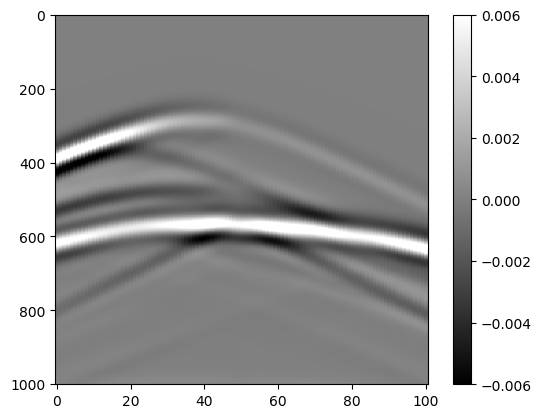

In [4]:
vars = matread("barycenter_data.mat")
data = get(vars, "data", 1)
data0 = get(vars, "data0", 1)
imshow(data-data0, aspect=0.1, cmap="gray"); colorbar(); clim([-0.006,0.006])

### Example 1

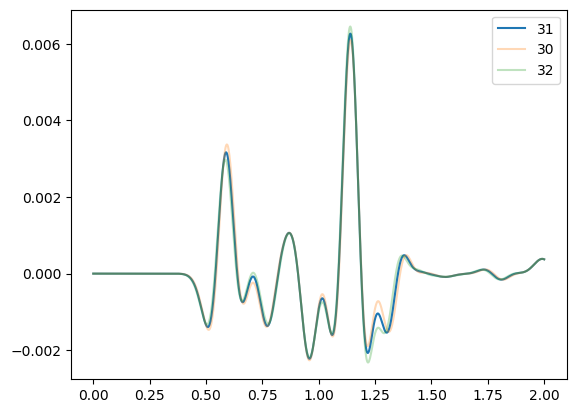

PyObject <matplotlib.legend.Legend object at 0x1393b6850>

In [5]:
f = data[:,31] - data0[:,31] 
g1 = data[:,30] - data0[:,30]
g2 = data[:,32] - data0[:,32]
Nt = length(f)
t = range(0, step=0.002, length=Nt)
M = cost_matrix_1d(t,t);
P = zeros(Nt,2)
P[:,1] = g1; P[:,2] = g2;

plot(t,f)
plot(t,g1,alpha=0.3)
plot(t,g2,alpha=0.3)
legend(["31", "30", "32"])

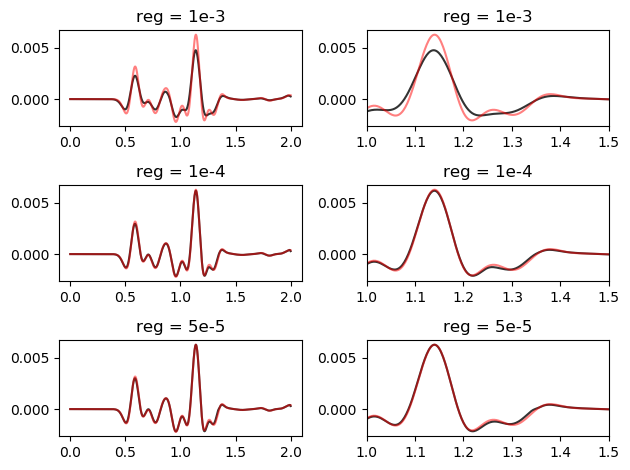

In [6]:
reg = 1e-3; 
reg_m = 1e2;
f0 = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=[1,3], iterMax=100, verbose=false);

subplot(321)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-3")

subplot(322)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-3"); xlim([1,1.5])

# ===========================================
reg = 1e-4; 
reg_m = 1e2;
f0 = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=[1,3], iterMax=100, verbose=false);

subplot(323)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-4")

subplot(324)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-4"); xlim([1,1.5])
# ===========================================
reg = 5e-5; 
reg_m = 1e2;
f0 = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=[1,3], iterMax=100, verbose=false);

subplot(325)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 5e-5")

subplot(326)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 5e-5"); xlim([1,1.5])

tight_layout()

### Example 2

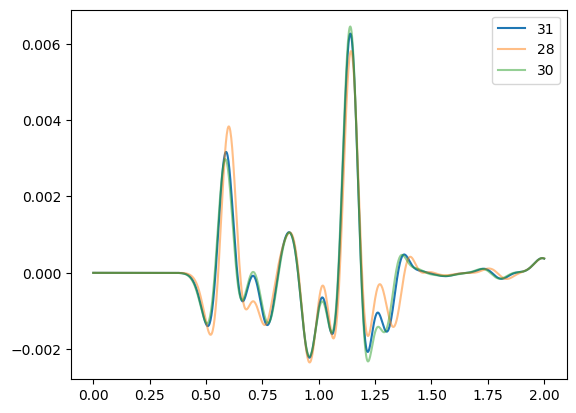

PyObject <matplotlib.legend.Legend object at 0x144e77b90>

In [7]:
f = data[:,31] - data0[:,31] 
g1 = data[:,28] - data0[:,28]
g2 = data[:,32] - data0[:,32]
M = cost_matrix_1d(t,t);
P = zeros(Nt,2)
P[:,1] = g1; P[:,2] = g2;

plot(t,f)
plot(t,g1,alpha=0.5)
plot(t,g2,alpha=0.5)
legend(["31", "28", "30"])

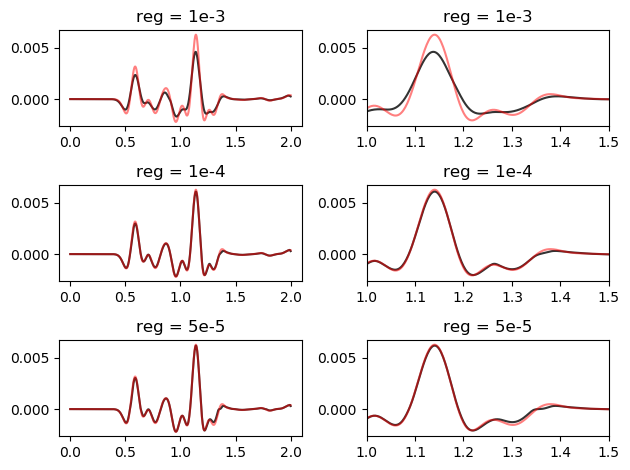

In [8]:
reg = 1e-3; 
reg_m = 1e2;
f0 = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=[1,3], iterMax=100, verbose=false);

subplot(321)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-3")

subplot(322)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-3"); xlim([1,1.5])

# ===========================================
reg = 1e-4; 
reg_m = 1e2;
f0 = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=[1,3], iterMax=100, verbose=false);

subplot(323)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-4")

subplot(324)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-4"); xlim([1,1.5])
# ===========================================
reg = 5e-5; 
reg_m = 1e2;
f0 = barycenter_unbalanced_1d_signal(P, M, reg, reg_m; lambda=[1,3], iterMax=100, verbose=false);

subplot(325)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 5e-5")

subplot(326)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 5e-5"); xlim([1,1.5])

tight_layout()

## Noise

In [9]:
f = data[:,31] - data0[:,31] 
g1 = data[:,30] - data0[:,30]
g2 = data[:,32] - data0[:,32]
N = zeros(Nt,2)
N[:,1] = (rand(Nt) .- 0.5)
N[:,2] = (rand(Nt) .- 0.5)
M = cost_matrix_1d(t,t);
P = zeros(Nt,2)
P[:,1] = g1; P[:,2] = g2;

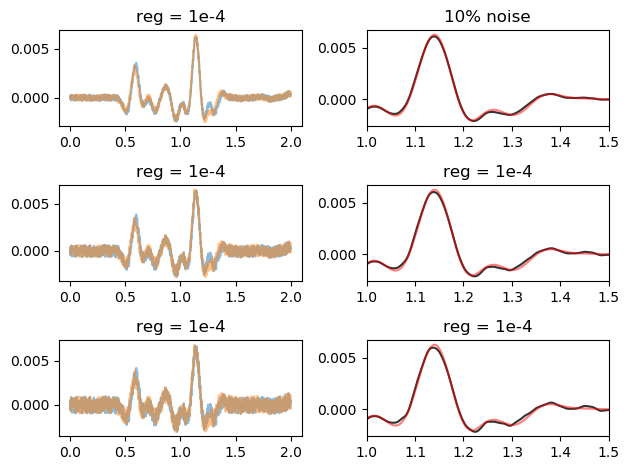

In [10]:
reg = 1e-4; 
reg_m = 1e2;
PP = P + 0.1*maximum(P).*N
f0 = barycenter_unbalanced_1d_signal(PP, M, reg, reg_m; lambda=[1,3], iterMax=100, verbose=false);

subplot(321)
plot(t,PP[:,1],alpha=0.5)
plot(t,PP[:,2],alpha=0.5)
title("reg = 1e-4")

subplot(322)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("10% noise"); xlim([1,1.5])

# ===========================================
reg = 1e-4; 
reg_m = 1e2;
PP = P + 0.2*maximum(P).*N
f0 = barycenter_unbalanced_1d_signal(PP, M, reg, reg_m; lambda=[1,3], iterMax=100, verbose=false);

subplot(323)
plot(t,PP[:,1],alpha=0.5)
plot(t,PP[:,2],alpha=0.5)
title("reg = 1e-4")

subplot(324)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-4"); xlim([1,1.5])
# ===========================================
reg = 1e-4; 
reg_m = 1e2;
PP = P + 0.3*maximum(P).*N
f0 = barycenter_unbalanced_1d_signal(PP, M, reg, reg_m; lambda=[1,3], iterMax=100, verbose=false);

subplot(325)
plot(t,PP[:,1],alpha=0.5)
plot(t,PP[:,2],alpha=0.5)
title("reg = 1e-4")

subplot(326)
plot(t,f0,color="k",alpha=0.8)
plot(t,f,color="r",alpha=0.5)
title("reg = 1e-4"); xlim([1,1.5])

tight_layout()